In [3]:
# imports
import os
os.environ['JAVA_HOME'] = r"C:\Program Files\Java\jdk-25\bin"
import geopandas as gpd

import r5py
import datetime

from osmnx import graph_from_place, graph_to_gdfs
from matplotlib import pyplot as plt
from shapely import Point, Polygon, unary_union





In [4]:
ct_gdf = gpd.read_file('./Census tract - Percentage of visible minority/Census tract - Percentage of visible minority, n.i.e..shp')
ct_gdf.rename(columns={'Value': 'Percentage of Home Ownership 2021'}, inplace=True)

da_home = gpd.read_file('./Dissemination area - Homeownership rate (%)/Dissemination area - Homeownership rate (%).shp')
da_home.rename(columns={'Value': 'Percentage of Home Ownership 2021'}, inplace=True)

In [5]:
bound = gpd.GeoSeries(da_home.geometry.union_all().boundary)

In [4]:
fig, ax = plt.subplots()

city_bound = gpd.GeoSeries(da_home.geometry.union_all())
city_boundary_gdf = gpd.GeoDataFrame({'id': [1], 'geometry': city_bound}, crs = ct_gdf.crs)
ct_gdf.plot(ax=ax, color = 'grey')
city_bound.plot(ax=ax, color = 'black')

toronto_ct = ct_gdf.overlay(city_boundary_gdf, how = 'intersection')

NameError: name 'plt' is not defined

<Axes: >

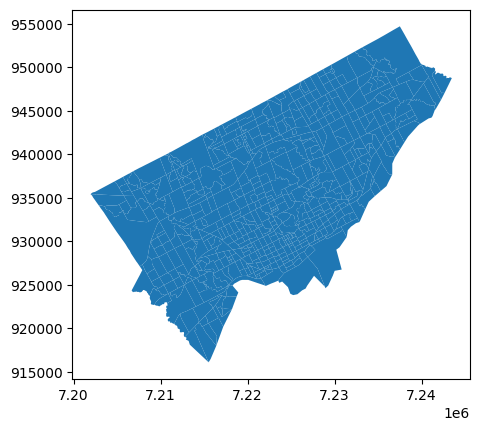

In [7]:
toronto_ct.plot()

In [8]:
toronto_ct['centroid'] = toronto_ct.geometry.centroid
centroid_points = gpd.GeoSeries(toronto_ct['centroid'].values)

<Axes: >

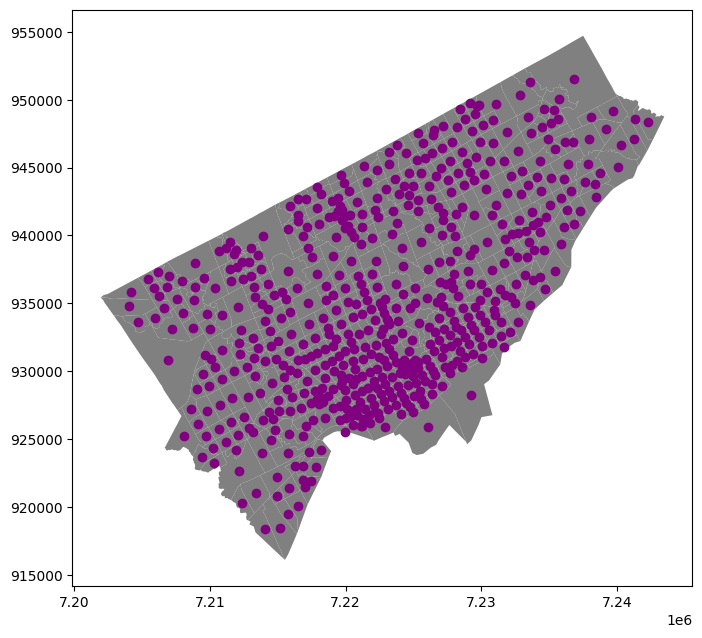

In [9]:
fig, ax2 = plt.subplots(figsize = (8,8))

toronto_ct.plot(ax=ax2, color = 'grey')
centroid_points.plot(ax=ax2, color = 'purple')


In [10]:
pbf_path = r"C:\Users\saman\Downloads\GGR375 Project\GGR375-Group-Project\Toronto.osm.pbf "
gtfs_path = r"C:\Users\saman\Downloads\GGR375 Project\GGR375-Group-Project\GTFS_2015.zip"

tn = r5py.TransportNetwork(pbf_path, gtfs = gtfs_path)

In [12]:
sample_origin_raw = centroid_points[4]

centroids_gdf = gpd.GeoDataFrame({'id' : [i for i in range(len(centroid_points))], 'geometry' : centroid_points})
#origin_snapped = tn.snap_to_network(centroids_gdf, radius = 500, street_mode=r5py.TransportMode.WALK)
# this produced empty points
print(centroids_gdf)
sample_origin = centroids_gdf.geometry.values[0]


      id                        geometry
0      0   POINT (7220577.77 926034.628)
1      1  POINT (7221217.103 925934.878)
2      2  POINT (7217846.196 922941.372)
3      3  POINT (7204051.301 934761.412)
4      4  POINT (7205425.539 936793.232)
..   ...                             ...
580  580  POINT (7228216.084 947971.663)
581  581   POINT (7212494.036 926653.27)
582  582  POINT (7210330.001 923199.799)
583  583  POINT (7215753.335 919444.482)
584  584  POINT (7221136.892 925962.967)

[585 rows x 2 columns]


In [13]:
isochrone_3 = r5py.Isochrones(
    tn,
    origins = sample_origin,
    departure=datetime.datetime(2015, 9, 10, 8, 30),
    transport_modes= [r5py.TransportMode.TRANSIT, r5py.TransportMode.WALK],
    isochrones=[15, 30, 45]
)

POINT (7220577.769579986 926034.6281830997)
Empty GeoDataFrame
Columns: [travel_time, geometry]
Index: []


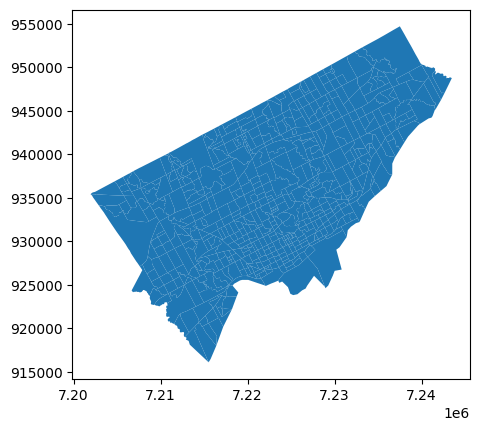

In [14]:
fig, ax3 = plt.subplots()
print(centroids_gdf.geometry.values[0])
toronto_ct.plot(ax=ax3)
print(isochrone_3.head())
#isochrones.plot(ax=ax3, color = 'red')

In [15]:
walking_network = graph_from_place('Wallace Emerson, Toronto, Ontario, Canada', network_type='walk')
walking_nodes, walking_edges = graph_to_gdfs(walking_network)


In [16]:
origin = walking_nodes.geometry.values[4]
print(origin)

POINT (-79.4343723 43.6704593)


In [17]:
isochrones3 = r5py.Isochrones(
    tn,
    origins = origin,#origins_gdf,
    departure=datetime.datetime(2015, 9, 10, 8, 30),
    transport_modes= [r5py.TransportMode.TRANSIT, r5py.TransportMode.WALK],
    isochrones=[10,20,30]
)

print(isochrones3)

      travel_time                                           geometry
0 0 days 00:10:00  MULTILINESTRING ((-79.43973 43.67312, -79.4396...
1 0 days 00:20:00  MULTILINESTRING ((-79.44674 43.68725, -79.4466...
2 0 days 00:30:00  MULTILINESTRING ((-79.37599 43.67219, -79.3759...


<Axes: >

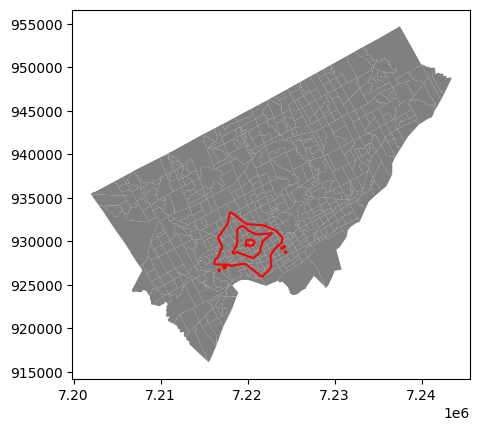

In [18]:
fig, ax4 = plt.subplots()

isochrones3 = isochrones3.to_crs(toronto_ct.crs)
toronto_ct.plot(ax=ax4, color='grey')
isochrones3.plot(ax=ax4, color = 'red')



In [19]:
half_ct_points = centroids_gdf.geometry.values[:100]

half_ct_gdf = gpd.GeoDataFrame({'id': [i for i in range(100)], 'geometry': half_ct_points})
# print(half_ct_gdf)
isochrones4 = r5py.Isochrones(
    tn,
    origins = half_ct_gdf,#origins_gdf,
    departure=datetime.datetime(2015, 9, 10, 8, 30),
    transport_modes= [r5py.TransportMode.TRANSIT, r5py.TransportMode.WALK],
    isochrones=[30]
)


<Axes: >

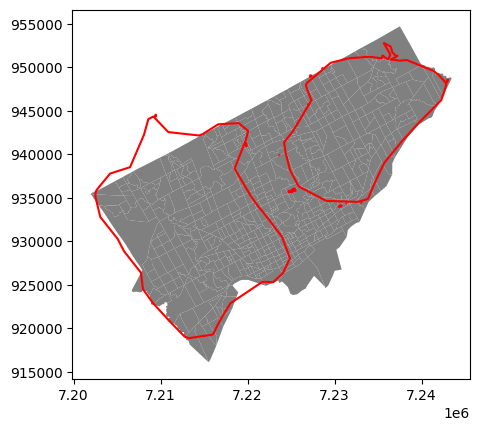

In [20]:
fig, ax5 = plt.subplots()
isochrones4 = isochrones4.to_crs(toronto_ct.crs)
toronto_ct.plot(ax=ax5, color = 'grey')
isochrones4.plot(ax=ax5, color = 'red')

In [21]:
#half_ct_points = centroids_gdf.geometry.values[:100]

# print(half_ct_gdf)
isochrones5 = r5py.Isochrones(
    tn,
    origins = centroids_gdf,#origins_gdf,
    departure=datetime.datetime(2015, 9, 10, 8, 30),
    transport_modes= [r5py.TransportMode.TRANSIT, r5py.TransportMode.WALK],
    isochrones=[20]
)

KeyboardInterrupt: 

(1, 2)
(1, 2)


<Axes: >

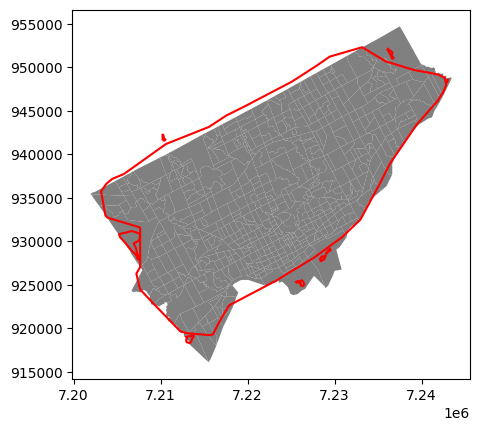

In [ ]:
fig, ax6 = plt.subplots()
print(isochrones5.shape)
print(isochrones3.shape)
isochrones5 = isochrones5.to_crs(toronto_ct.crs)
toronto_ct.plot(ax=ax6, color = 'grey')
isochrones5.plot(ax=ax6, color = 'red')

In [ ]:
isochrones_5min = r5py.Isochrones(
    tn,
    origins = centroids_gdf,#origins_gdf,
    departure=datetime.datetime(2015, 9, 10, 8, 30),
    transport_modes= [r5py.TransportMode.TRANSIT, r5py.TransportMode.WALK],
    isochrones=[5]
)




In [ ]:
isochrones_10min = r5py.Isochrones(
    tn,
    origins = centroids_gdf,#origins_gdf,
    departure=datetime.datetime(2015, 9, 10, 8, 30),
    transport_modes= [r5py.TransportMode.TRANSIT, r5py.TransportMode.WALK],
    isochrones=[10]
)

<Axes: >

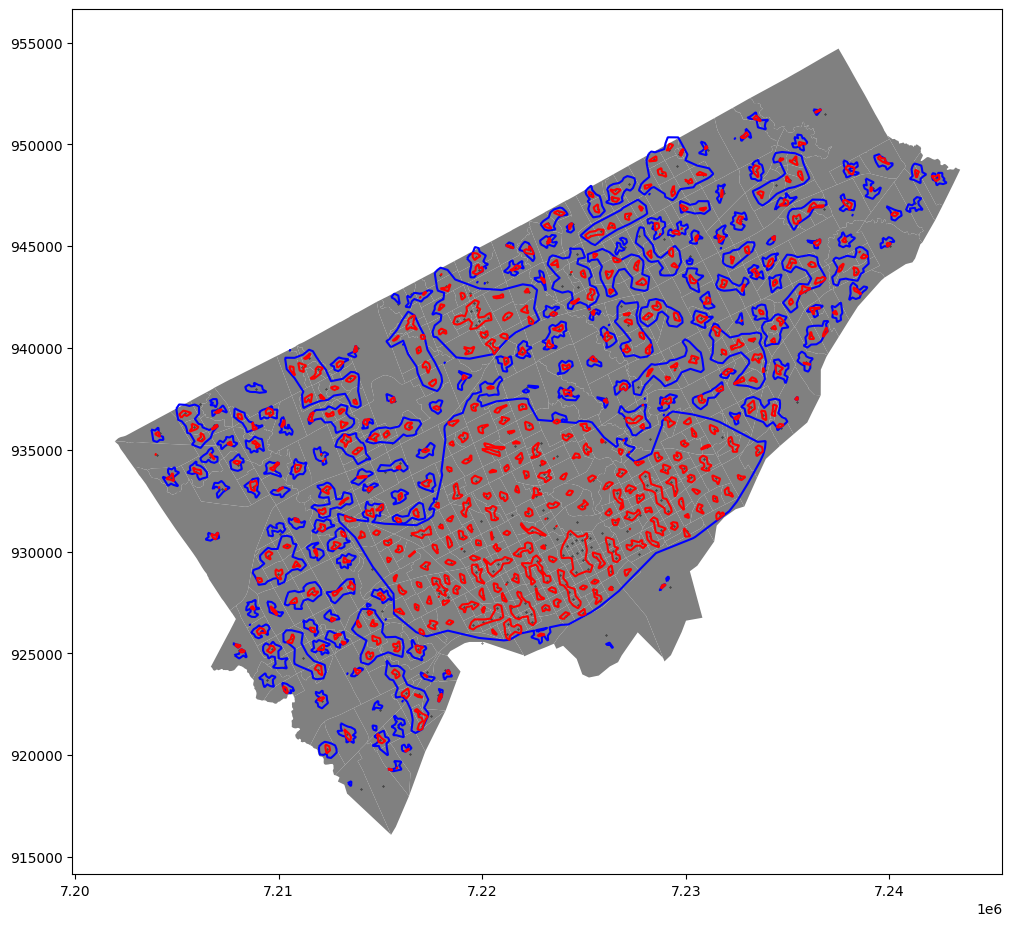

In [ ]:
fig, ax7 = plt.subplots(figsize = (12,12))

isochrones_5min = isochrones_5min.to_crs(toronto_ct.crs)
isochrones_10min = isochrones_10min.to_crs(toronto_ct.crs)
toronto_ct.plot(ax=ax7, color = 'grey')
centroid_points.plot(ax=ax7, color = 'black', markersize = 0.1)
isochrones_10min.plot(ax=ax7, color = 'blue', markersize=0.1)
isochrones_5min.plot(ax=ax7, color = 'red', markersize=0.1)

In [ ]:
to_walking_network = graph_from_place('Toronto, Ontario, Canada', network_type='walk')
to_walking_nodes, to_walking_edges = graph_to_gdfs(to_walking_network)

<Axes: >

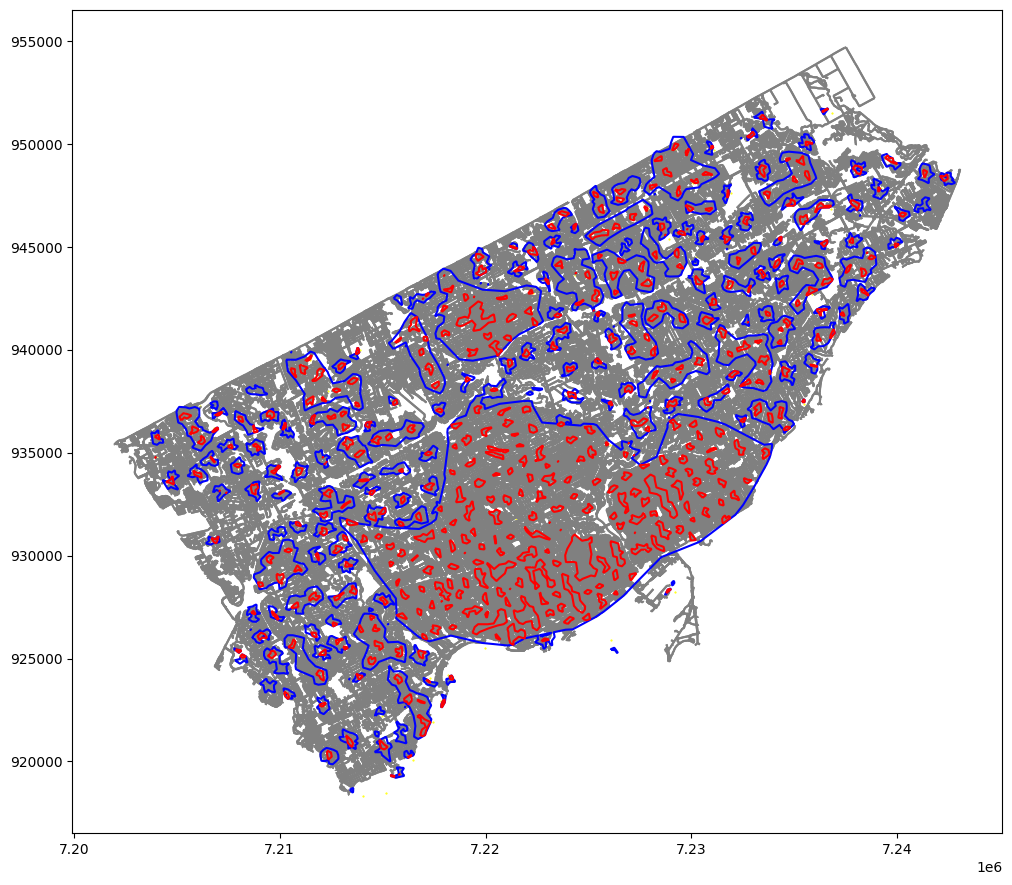

In [ ]:
to_walking_edges = to_walking_edges.to_crs(toronto_ct.crs)
fig, ax8 = plt.subplots(figsize = (12,12))

toronto_ct.plot(ax=ax7, color = 'black')
to_walking_edges.plot(ax=ax8, color = 'grey')
centroid_points.plot(ax=ax8, color = 'yellow', markersize = 0.3)
isochrones_10min.plot(ax=ax8, color = 'blue', markersize=0.1)
isochrones_5min.plot(ax=ax8, color = 'red', markersize=0.1)

<Axes: >

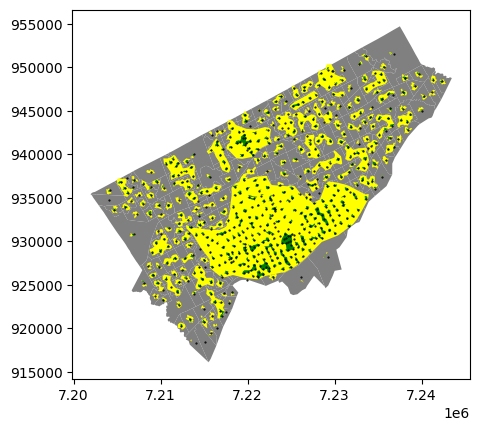

In [ ]:
from shapely import Polygon
min5_polygons = gpd.GeoSeries(isochrones_5min.geometry.values).polygonize()
min10_polygons = gpd.GeoSeries(isochrones_10min.geometry.values).polygonize()

fig,ax9 = plt.subplots()

toronto_ct.plot(ax=ax9, color='grey')
min10_polygons.plot(ax=ax9, color = 'yellow')
min5_polygons.plot(ax=ax9, color = 'green')
centroid_points.plot(ax=ax9, color = 'black', markersize=0.3)


<Axes: >

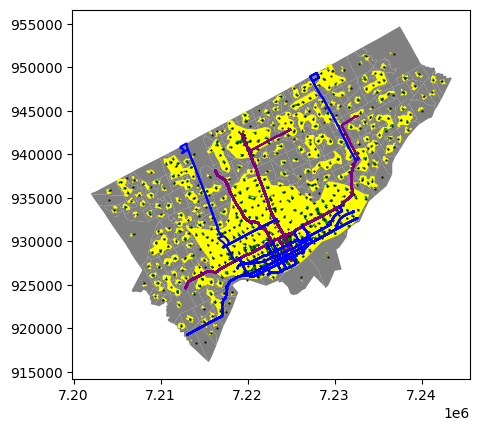

In [ ]:
subway_lines = gpd.read_file('./sept_2015_subway/subway.shp')
subway_lines = subway_lines.to_crs(toronto_ct.crs)
streetcar_lines = gpd.read_file('./sept_2015_streetcar/streetcar.shp')
streetcar_lines = streetcar_lines.to_crs(toronto_ct.crs)
bus_lines = gpd.read_file('./sept_2015_bus/bus.shp')
bus_lines = bus_lines.to_crs(toronto_ct.crs)

fig,ax9 = plt.subplots()

toronto_ct.plot(ax=ax9, color='grey')
min10_polygons.plot(ax=ax9, color = 'yellow')
min5_polygons.plot(ax=ax9, color = 'green')
subway_lines.plot(ax=ax9, color = 'purple')
streetcar_lines.plot(ax=ax9, color = 'blue', markersize=0.3)
#bus_lines.plot(ax=ax9, color = 'red', markersize=0.05)
centroid_points.plot(ax=ax9, color = 'black', markersize=0.3)

   ESRI_OID                Location  Percentage of Home Ownership 2021  \
0       NaN  5350004.00 [CT] (Ont.)                               12.7   
1       NaN  5350007.01 [CT] (Ont.)                               10.3   

                 DGUID  id                                           geometry  \
0  2021S05075350004.00   1  POLYGON ((7220963.994 925916.097, 7220979.511 ...   
1  2021S05075350007.01   1  POLYGON ((7221415.046 925996.72, 7221452.109 9...   

                         centroid  
0   POINT (7220577.77 926034.628)  
1  POINT (7221217.103 925934.878)  
285    POINT (7224626.434 930549.855)
Name: centroid, dtype: geometry


<Axes: >

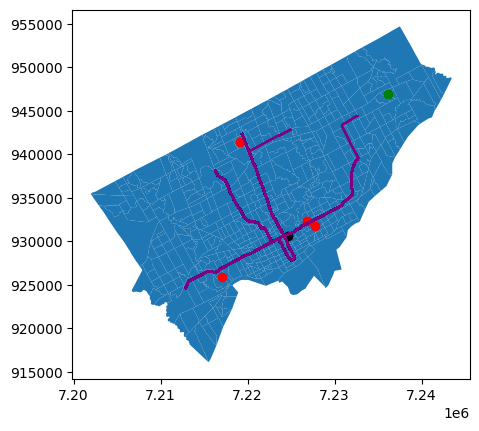

In [74]:
fig, ax = plt.subplots()
subway_lines = gpd.read_file('./sept_2015_subway/subway.shp')
subway_lines = subway_lines.to_crs(toronto_ct.crs)
best = toronto_ct[toronto_ct['DGUID'] == "2021S05075350063.03"]['centroid']
print(toronto_ct.head(2))
print(best)
toronto_ct.plot(ax=ax)
random_choices = gpd.GeoSeries([toronto_ct['centroid'].values[535],
                               toronto_ct['centroid'].values[400],
                               toronto_ct['centroid'].values[450],
                               toronto_ct['centroid'].values[420]])

worst = toronto_ct[toronto_ct['DGUID'] == "2021S05075350363.04"]['centroid']
best.plot(ax=ax, color='black')
worst.plot(ax=ax, color='green')
subway_lines.plot(ax=ax, color = 'purple')
random_choices.plot(ax=ax, color = 'red')

In [80]:
best_gdf = gpd.GeoDataFrame({'id': [1], 'geometry': best})
best_iso = r5py.Isochrones(
    tn,
    origins = best_gdf,#origins_gdf,
    departure=datetime.datetime(2015, 9, 10, 8, 30),
    transport_modes= [r5py.TransportMode.TRANSIT, r5py.TransportMode.WALK],
    isochrones=[15,30]
)

In [81]:
worst_gdf = gpd.GeoDataFrame({'id': [1], 'geometry': worst})

worst_iso = r5py.Isochrones(
    tn,
    origins = worst_gdf,#origins_gdf,
    departure=datetime.datetime(2015, 9, 10, 8, 30),
    transport_modes= [r5py.TransportMode.TRANSIT, r5py.TransportMode.WALK],
    isochrones=[15,30]
)

<Axes: >

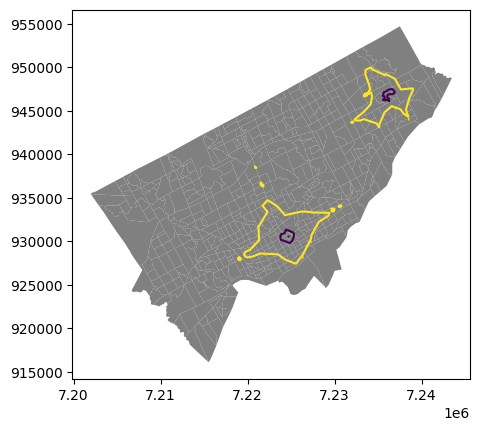

In [ ]:
fig, ax = plt.subplots()
subway_lines = gpd.read_file('./sept_2015_subway/subway.shp')
subway_lines = subway_lines.to_crs(toronto_ct.crs)

toronto_ct.plot(color = 'grey', ax=ax)


best_iso = best_iso.to_crs(toronto_ct.crs)#.polygonize()
best_iso.plot(ax=ax, cmap = 'viridis')
best.plot(ax=ax, color='black', markersize = 0.2)

worst_iso=worst_iso.to_crs(toronto_ct.crs)#.polygonize() #maybe get a concave hull of this stuff or union at least
worst_iso.plot(ax=ax, cmap='viridis')

worst.plot(ax=ax, color='black', markersize = 0.2)
#subway_lines.plot(ax=ax, color = 'red', markersize=0.1)


In [ ]:
def generate_iso(point, time):
    # Generates a <time> minute isochrone around <point> using a combination transit-walking network
    # returns the isochrone as a GDF with attributes 'time', 'geometry', and 'id' with crs to match
    # toronto_ct.crs
    
    point_gdf = gpd.GeoDataFrame({'id': [1], 'geometry': point}, crs = toronto_ct.crs)

    iso = r5py.Isochrones(
        tn,
        origins = point_gdf,
        departure=datetime.datetime(2015, 9, 10, 8, 30),
        transport_modes= [r5py.TransportMode.TRANSIT, r5py.TransportMode.WALK],
        isochrones=[time]
    )
    return (time, iso.geometry)
    # iso['geometry'] = iso.polygonize().union_all()
    # iso['time'] = [time]
    # iso = iso.to_crs(toronto_ct.crs)
    # return iso



Text(0.5, 1.0, 'Sample Isochrone')

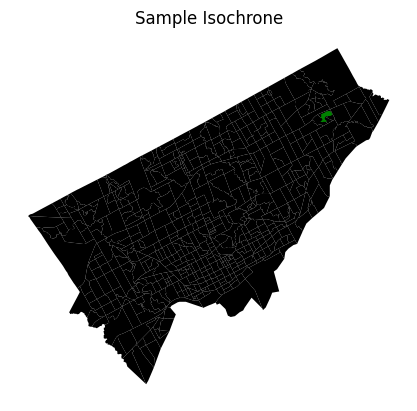

In [123]:
def plot_iso(iso: gpd.GeoDataFrame):
    fig, ax = plt.subplots()

    toronto_ct.plot(ax=ax, color = 'black')
    toronto_ct.set_crs('3347')
    iso.plot(ax=ax, color = 'green')
    ax.set_axis_off()
    return ax

test = generate_iso(worst, 15)
ax = plot_iso(test)
ax.set_title('Sample Isochrone')


In [125]:
#for point in toronto_ct['id'].values():

print(toronto_ct.columns)
print(toronto_ct.crs)
# toronto_ct['iso_15'] = toronto_ct.applymap(generate_iso)

# toronto_ct['iso_15'] = toronto_ct.apply(lambda row: generate_iso([row['centroid']], 15), axis=1)
# iso_15s = []
# for point in toronto_ct['centroid'].values:
#     print(point)
#     iso_15s.append(generate_iso(point, 15))

# print(type(centroid_points))

# print(type(toronto_ct['centroid'].values[0]))
# generate_iso(toronto_ct['centroid'].values[10], 15)

Index(['ESRI_OID', 'Location', 'Percentage of Home Ownership 2021', 'DGUID',
       'id', 'geometry', 'centroid'],
      dtype='object')
EPSG:3347


In [3]:
toronto_ct = toronto_ct[['geometry', 'Location', 'DGUID', 'centroid']]
toronto_ct_subset = toronto_ct.iloc[:60]
#toronto_ct_subset = toronto_ct[toronto_ct[]]
toronto_ct_subset['iso_15'] = toronto_ct_subset.apply(lambda row: generate_iso([row['centroid']], 15), axis=1)


NameError: name 'toronto_ct' is not defined

[1.87196547e-03 2.26587365e-03 1.94275034e-04 9.55581108e-05
 1.67380421e-03 5.58238614e-04 2.56496353e-03 2.70995346e-03
 7.29659625e-04 1.25983042e-03 1.57521106e-03 1.22141181e-03
 2.56895657e-03 1.28868549e-03 2.71006619e-03 1.47869731e-03
 1.92599156e-03 2.76159344e-03 2.90202890e-03 1.03377042e-03
 9.62808157e-04 1.96264188e-04 1.37026161e-03 6.88175929e-04
 1.27307194e-03 1.18435304e-03 1.06421591e-03 3.59897485e-03
 1.31448065e-03 2.92073441e-03 1.15956337e-03 1.38908749e-03
 1.62704739e-03 1.44232903e-03 2.11495501e-03 1.60302468e-03
 1.30349205e-03 1.17929642e-03 3.62254482e-03 1.08626342e-03
 1.31149897e-03 2.23638984e-04 5.59630474e-04 1.30075270e-03
 1.24558532e-03 4.35815229e-04 2.08813155e-03 1.55539786e-03
 1.24348530e-03 2.65012207e-03 1.30109228e-03 7.05782193e-04
 2.02843949e-03 1.90826357e-03 1.68982713e-03 2.23878851e-03
 1.48342414e-03 9.17232314e-04 7.21507727e-04 1.49386169e-03]


C:\Users\saman\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\geopandas\geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


<Axes: >

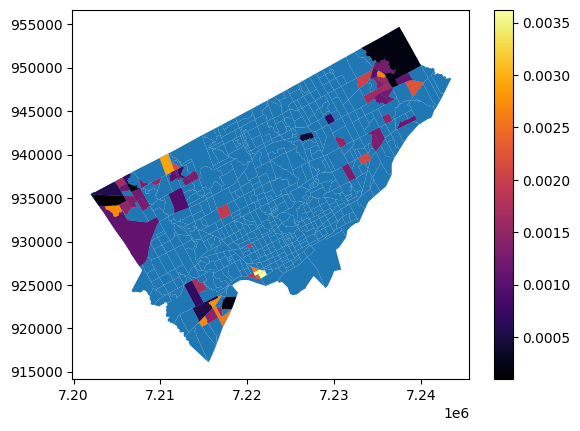

In [176]:
study_area = toronto_ct.union_all().area

# m = toronto_ct_subset['iso_15'].values[0]
# print(type(m.geometry.area))
# print(m.geometry.area[0])


def calc_percentage(iso):
    #print(iso[0])
    m = iso[0].geometry.area / study_area
    return m


toronto_ct_subset['area_percentage'] = toronto_ct_subset.apply(lambda row: calc_percentage([row['iso_15']]), axis=1)

print(toronto_ct_subset['area_percentage'].values)
#toronto_ct_subset['area_percentage'] = toronto_ct_subset['iso_15'].area/study_area

sorted = toronto_ct_subset.sort_values(by='area_percentage')
fig,ax = plt.subplots()
toronto_ct.plot(ax=ax)
toronto_ct_subset.plot(ax=ax, column = 'area_percentage', legend = True, cmap = 'inferno')

In [177]:
toronto_ct = toronto_ct[['geometry', 'Location', 'DGUID', 'centroid']]
toronto_ct_subset2 = toronto_ct.iloc[60:120]
#toronto_ct_subset = toronto_ct[toronto_ct[]]
toronto_ct_subset2['iso_15'] = toronto_ct_subset2.apply(lambda row: generate_iso([row['centroid']], 15), axis=1)



C:\Users\saman\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\geopandas\geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


C:\Users\saman\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\geopandas\geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


<Axes: >

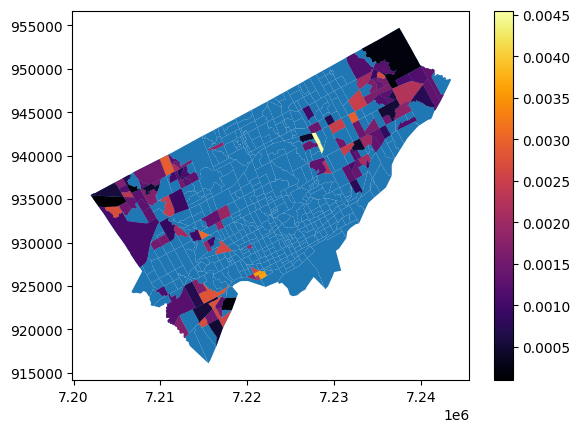

In [181]:
toronto_ct_subset2['area_percentage'] = toronto_ct_subset2.apply(lambda row: calc_percentage([row['iso_15']]), axis=1)

#print(toronto_ct_subset2['area_percentage'].values)
#toronto_ct_subset['area_percentage'] = toronto_ct_subset['iso_15'].area/study_area

fig,ax = plt.subplots()
toronto_ct.plot(ax=ax)
#toronto_ct_subset.plot(ax=ax, column = 'area_percentage', legend = True, cmap = 'inferno')
#toronto_ct_subset2.plot(ax=ax, column = 'area_percentage', legend = True, cmap = 'inferno')
import pandas as pd

total_gdf = pd.concat([toronto_ct_subset, toronto_ct_subset2])
total_gdf.plot(ax=ax, column = 'area_percentage', legend = True, cmap = 'inferno')

In [182]:
toronto_ct_subset3 = toronto_ct.iloc[120:200]
#toronto_ct_subset = toronto_ct[toronto_ct[]]
toronto_ct_subset3['iso_15'] = toronto_ct_subset3.apply(lambda row: generate_iso([row['centroid']], 15), axis=1)



C:\Users\saman\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\geopandas\geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


C:\Users\saman\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\geopandas\geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


<Axes: >

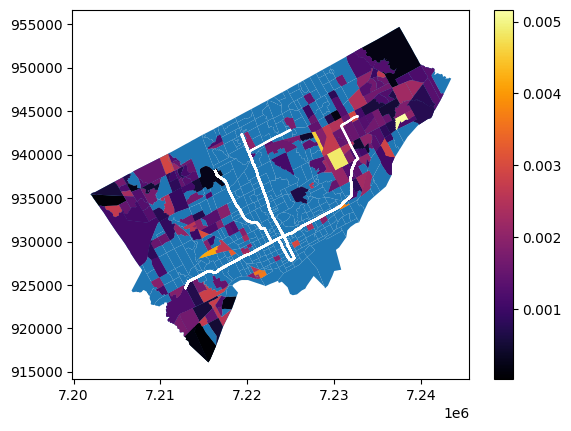

In [184]:
toronto_ct_subset3['area_percentage'] = toronto_ct_subset3.apply(lambda row: calc_percentage([row['iso_15']]), axis=1)

#print(toronto_ct_subset2['area_percentage'].values)
#toronto_ct_subset['area_percentage'] = toronto_ct_subset['iso_15'].area/study_area

fig,ax = plt.subplots()
toronto_ct.plot(ax=ax)
#toronto_ct_subset.plot(ax=ax, column = 'area_percentage', legend = True, cmap = 'inferno')
#toronto_ct_subset2.plot(ax=ax, column = 'area_percentage', legend = True, cmap = 'inferno')
import pandas as pd

total_gdf = pd.concat([total_gdf, toronto_ct_subset3])
total_gdf.plot(ax=ax, column = 'area_percentage', legend = True, cmap = 'inferno')
subway_lines.plot(ax=ax, color='white')

In [185]:
toronto_ct_subset4 = toronto_ct.iloc[200:300]
#toronto_ct_subset = toronto_ct[toronto_ct[]]
toronto_ct_subset4['iso_15'] = toronto_ct_subset4.apply(lambda row: generate_iso([row['centroid']], 15), axis=1)


C:\Users\saman\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\geopandas\geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


C:\Users\saman\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\geopandas\geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


<Axes: >

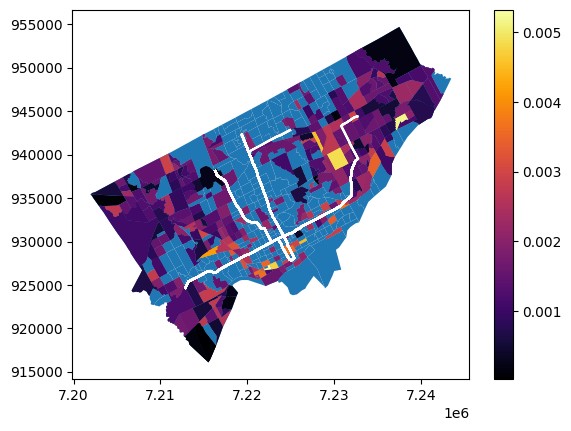

In [186]:
toronto_ct_subset4['area_percentage'] = toronto_ct_subset4.apply(lambda row: calc_percentage([row['iso_15']]), axis=1)

#print(toronto_ct_subset2['area_percentage'].values)
#toronto_ct_subset['area_percentage'] = toronto_ct_subset['iso_15'].area/study_area

fig,ax = plt.subplots()
toronto_ct.plot(ax=ax)
#toronto_ct_subset.plot(ax=ax, column = 'area_percentage', legend = True, cmap = 'inferno')
#toronto_ct_subset2.plot(ax=ax, column = 'area_percentage', legend = True, cmap = 'inferno')
import pandas as pd

total_gdf = pd.concat([total_gdf, toronto_ct_subset4])
total_gdf.plot(ax=ax, column = 'area_percentage', legend = True, cmap = 'inferno')
subway_lines.plot(ax=ax, color='white')

In [203]:
print(total_gdf.columns)


DGUID_PERCENTAGE = total_gdf[['DGUID', 'area_percentage', 'geometry']]
DGUID_CENTROID = total_gdf[['DGUID', 'centroid']]
DGUID_ISO_15 = total_gdf[['DGUID', 'iso_15']]
#DGUID_GEOM = total_gdf[['DGUID', 'geometry']]

Index(['geometry', 'Location', 'DGUID', 'centroid', 'iso_15',
       'area_percentage'],
      dtype='object')


In [ ]:
DGUID_PERCENTAGE.to_file('DGUID_PERCENTAGE_unfinished.shp')
DGUID_CENTROID.to_file('DGUID_CENTROID_unfinished.shp')
#DGUID_GEOM.to_file('DGUID_GEOM_unfinished.shp')




C:\Users\saman\AppData\Local\Temp\ipykernel_25780\2372257481.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  DGUID_PERCENTAGE.to_file('DGUID_PERCENTAGE_unfinished.shp')
C:\Users\saman\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\pyogrio\raw.py:723: RuntimeWarning: Normalized/laundered field name: 'area_percentage' to 'area_perce'
  ogr_write(


AttributeError: 'DataFrame' object has no attribute 'to_file'

In [245]:
# geom = {}
# #toronto_ct[toronto_ct['DGUID'] == "2021S05075350363.04"]['centroid']
# for id in DGUID_ISO_15['DGUID'].values:
#     iso = DGUID_ISO_15[DGUID_ISO_15['DGUID'] == id]
#     print(iso.columns)
#     #geom[id] = iso['geometry']

dguids = []
geoms = []
for id in total_gdf['DGUID'].values:
    get = total_gdf[total_gdf['DGUID'] == id]
    g = get['iso_15'].iloc[0].geometry
    dguids.append(id)
    geoms.append(g[0])

#print(type(geoms[1][0]))
d = {'DGUID': dguids, 'geometry': geoms}
# # print(type(geom['2021S05075350004.00']))

DGUID_ISO_15 = gpd.GeoDataFrame(d, crs = toronto_ct.crs)
DGUID_ISO_15.to_file('DGUID_ISO_15_unfinished.shp')

In [1]:
def generate_iso(point, time):
    # Generates a <time> minute isochrone around <point> using a combination transit-walking network
    # returns the isochrone as a GDF with attributes 'time', 'geometry', and 'id' with crs to match
    # toronto_ct.crs
    
    point_gdf = gpd.GeoDataFrame({'id': [1], 'geometry': point}, crs = toronto_ct.crs)

    iso = r5py.Isochrones(
        tn,
        origins = point_gdf,
        departure=datetime.datetime(2015, 9, 10, 8, 30),
        transport_modes= [r5py.TransportMode.TRANSIT, r5py.TransportMode.WALK],
        isochrones=[time]
    )
    return iso.geometry
    # iso['geometry'] = iso.polygonize().union_all()
    # iso['time'] = [time]
    # iso = iso.to_crs(toronto_ct.crs)
    # return iso

In [2]:
new_total = toronto_ct.iloc[300:400][['DGUID', 'geometry']]
#toronto_ct_subset = toronto_ct[toronto_ct[]]
new_total['geometry'] = new_total.apply(lambda row: generate_iso([row['centroid']], 15), axis=1)

NameError: name 'toronto_ct' is not defined

In [ ]:
new_total['area_percentage'] = new_total.geometry.area / study_area

#print(toronto_ct_subset2['area_percentage'].values)
#toronto_ct_subset['area_percentage'] = toronto_ct_subset['iso_15'].area/study_area

fig,ax = plt.subplots()
toronto_ct.plot(ax=ax)
#toronto_ct_subset.plot(ax=ax, column = 'area_percentage', legend = True, cmap = 'inferno')
#toronto_ct_subset2.plot(ax=ax, column = 'area_percentage', legend = True, cmap = 'inferno')
import pandas as pd

total_gdf = pd.concat([total_gdf, toronto_ct_subset4])
total_gdf.plot(ax=ax, column = 'area_percentage', legend = True, cmap = 'inferno')
subway_lines.plot(ax=ax, color='white')